### Import Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Data Preprocessing

#### Reading the Data

In [2]:
import pandas as pd
df = pd.read_csv("Breast_Cancer.csv")


In [3]:
df.sample(10)

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
3144,66,White,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,37,Positive,Positive,7,1,73,Alive
3870,45,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,21,Positive,Positive,18,2,77,Alive
3110,40,Other,Married,T3,N1,IIIA,Poorly differentiated,3,Regional,100,Positive,Negative,18,1,81,Alive
2611,45,Black,Divorced,T1,N1,IIA,Poorly differentiated,3,Regional,13,Positive,Positive,12,1,107,Alive
2067,44,White,Married,T1,N1,IIA,Well differentiated,1,Regional,17,Positive,Positive,16,15,94,Alive
125,62,White,Married,T1,N1,IIA,Moderately differentiated,2,Regional,17,Positive,Positive,16,1,14,Dead
1218,69,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,30,Positive,Positive,26,2,98,Alive
3623,56,Black,Single,T2,N2,IIIA,Poorly differentiated,3,Regional,30,Positive,Negative,17,7,95,Alive
537,69,White,Widowed,T2,N1,IIB,Moderately differentiated,2,Regional,23,Positive,Positive,7,1,53,Dead
172,49,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,12,Positive,Positive,9,2,84,Alive


#### checking Null values

In [4]:
missing_values = df.isnull().sum()
missing_values

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

#### Checking duplicates

In [5]:
dupicates = df.duplicated().sum()
dupicates

np.int64(1)

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
#Taking a copy from the origenal data for the model
df_model=df.copy() 

####  Encoding

In [8]:
#mapping the binary categorical values
df_model['Status'] = df_model['Status'].map({'Alive': 1, 'Dead': 0})
df_model['Progesterone Status'] = df_model['Progesterone Status'].map({'Positive': 1, 'Negative': 0})
df_model['Estrogen Status'] = df_model['Estrogen Status'].map({'Positive': 1, 'Negative': 0})
df_model['A Stage'] = df_model['A Stage'].map({'Regional': 1, 'Distant': 0})


In [9]:
df_model['differentiate'].value_counts()


differentiate
Moderately differentiated    2350
Poorly differentiated        1111
Well differentiated           543
Undifferentiated               19
Name: count, dtype: int64

In [10]:
df_model['differentiate']= df_model['differentiate'].map({'Well differentiated': 3, 'Moderately differentiated': 2, 'Poorly differentiated': 1,'Undifferentiated':0})

In [11]:
df_model['6th Stage'].value_counts()

6th Stage
IIA     1304
IIB     1130
IIIA    1050
IIIC     472
IIIB      67
Name: count, dtype: int64

In [12]:
df_model['6th Stage'] = df_model['6th Stage'].map({'IIA': 1, 'IIB': 2, 'IIIA': 3, 'IIIB': 4, 'IIIC': 5})

In [13]:
df_model['Race'].value_counts()

Race
White    3412
Other     320
Black     291
Name: count, dtype: int64

In [14]:
df_model = pd.get_dummies(df_model, columns=['Race'], prefix='Race', dtype='int')

In [15]:
df_model['T Stage '].value_counts()

T Stage 
T2    1786
T1    1602
T3     533
T4     102
Name: count, dtype: int64

In [16]:
df_model['N Stage'].value_counts()

N Stage
N1    2731
N2     820
N3     472
Name: count, dtype: int64

In [17]:
import pandas as pd
df_model['T Stage ']= df_model['T Stage '].map({'T1': 1, 'T2': 2, 'T3': 3, 'T4': 4})
df_model['N Stage']=df_model['N Stage'].map({'N1': 1, 'N2': 2, 'N3': 3})


In [18]:
df_model['Marital Status'].value_counts()

Marital Status
Married      2642
Single        615
Divorced      486
Widowed       235
Separated      45
Name: count, dtype: int64

In [19]:
df_model = pd.get_dummies(df_model, columns=['Marital Status'], prefix='Marital Status', dtype='int')

In [20]:
df_model['Grade'].value_counts()


Grade
2                        2350
3                        1111
1                         543
 anaplastic; Grade IV      19
Name: count, dtype: int64

In [21]:
df_model['Grade'].replace({'1': 1, '2': 2, '3': 3, ' anaplastic; Grade IV': 4}, inplace=True)

C:\Users\mo\AppData\Local\Temp\ipykernel_26080\2518483801.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_model['Grade'].replace({'1': 1, '2': 2, '3': 3, ' anaplastic; Grade IV': 4}, inplace=True)
C:\Users\mo\AppData\Local\Temp\ipykernel_26080\2518483801.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasti

#### Correlation Matrix

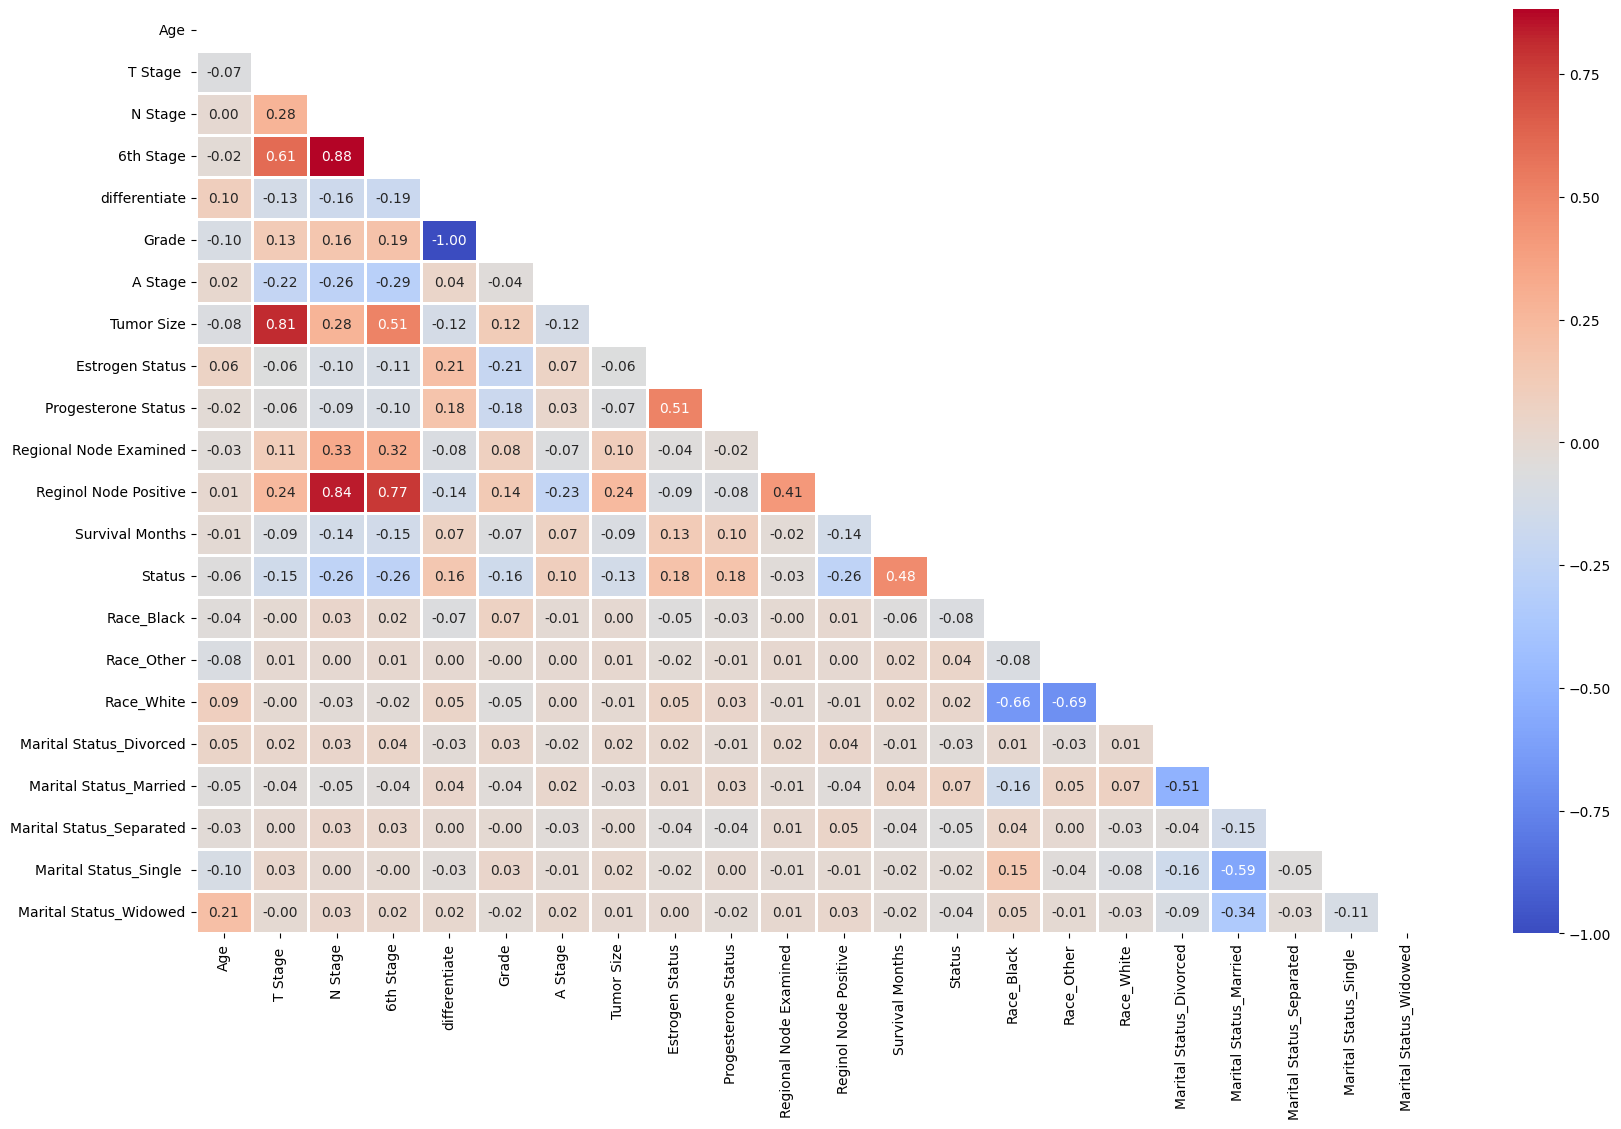

In [22]:
plt.figure(figsize=(20,12))
corr=df_model.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, linewidths=1, annot=True, fmt = ".2f", cmap='coolwarm')
plt.show()

In [23]:
high_corr_pairs = []
for i in range(len(corr.columns)):
    for j in range(i + 1, len(corr.columns)):
        if abs(corr.iloc[i, j]) > 0.8:
            high_corr_pairs.append((
                corr.columns[i],
                corr.columns[j],
                corr.iloc[i, j]
            ))

for pair in high_corr_pairs:
    print(f"{pair[0]} and {pair[1]}: {pair[2]:.2f}")

T Stage  and Tumor Size: 0.81
N Stage and 6th Stage: 0.88
N Stage and Reginol Node Positive: 0.84
differentiate and Grade: -1.00


In [24]:
df_model['Survival Months'].value_counts().sort_index()

Survival Months
1       1
2       3
3       4
4      10
5       6
       ..
103    50
104    48
105    45
106    47
107    61
Name: count, Length: 107, dtype: int64

In [25]:
df_model.drop(['Survival Months'], axis=1, inplace=True)

In [26]:
df_model.drop(['Grade'], axis=1, inplace=True)
df_model.drop(['T Stage '], axis=1, inplace=True)
df_model.drop(['N Stage'], axis=1, inplace=True)

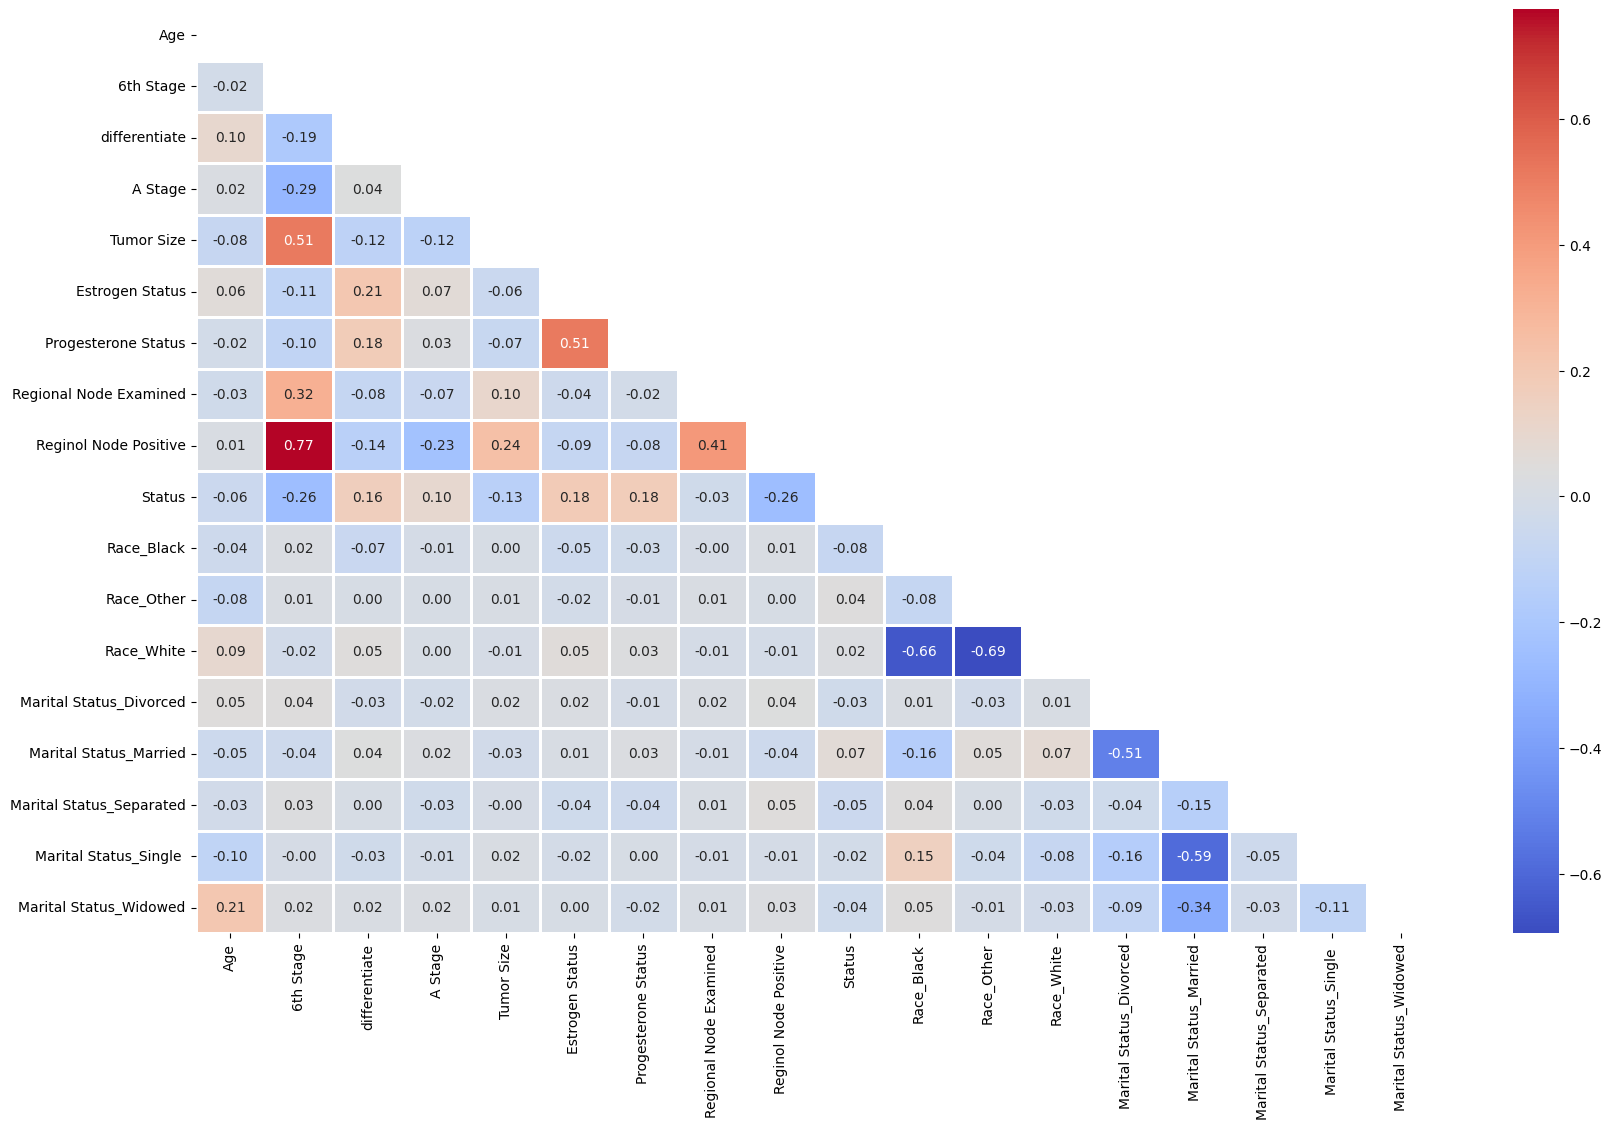

In [27]:

plt.figure(figsize=(20,12))
corr=df_model.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, linewidths=1, annot=True, fmt = ".2f",cmap='coolwarm')
plt.show()

## 2. Visualizations

### Survival Status and Tumor Size Relationship

In [28]:
import plotly.express as px
import plotly.io as pio

custom_colors = ['#636EFA', '#EF553B']  

fig = px.scatter(
    df,
    x='Tumor Size',
    y='Survival Months',
    color='Status',
    symbol='Status',
    size='Tumor Size',  # size represents tumor size visually
    size_max=18,
    color_discrete_sequence=custom_colors,
    hover_data={
        '6th Stage': True,
        'Grade': True,
        'Age': True,
        'Race': True,
        'Tumor Size': ':.2f',
        'Survival Months': ':.1f',
        'Status': False  # already in color/symbol
    },
    title='Tumor Size vs Survival Months by Survival Status',
    labels={
        'Tumor Size': 'Tumor Size (mm)',
        'Survival Months': 'Survival Months',
        'Status': 'Survival Status'
    }
)

# Update marker appearance
fig.update_traces(
    marker=dict(opacity=0.7, line=dict(width=1, color='black')),
    selector=dict(mode='markers')
)

# Enhance layout
fig.update_layout(
    width=900,
    height=600,
    showlegend=True,
    legend_title_text='Survival Status',
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(size=13),
    xaxis=dict(
        title='Tumor Size (mm)',
        gridcolor='lightgray',
        zeroline=False
    ),
    yaxis=dict(
        title='Survival Months',
        gridcolor='lightgray',
        zeroline=False
    ),
    title=dict(
        font_size=18,
        x=0.5
    )
)

fig.show()


- Smaller tumor sizes are more associated with longer survival months and **"Alive"** status.
- Larger tumor sizes are generally associated with shorter survival months and **"Dead"** status.
- Smaller tumors are associated with better survival outcomes.
- However, there is significant overlap between the two groups, showing that survival status is influenced by multiple factors beyond tumor size.

###  Insights from Survival Distributions by T Stage and Estrogen Status

In [29]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

mean_tumor_size = df.groupby(['T Stage ', 'Estrogen Status'])['Tumor Size'].mean().round(2)

t_stages = sorted(df['T Stage '].dropna().unique())  # e.g. ['T1', 'T2', 'T3']
estrogen_statuses = sorted(df['Estrogen Status'].dropna().unique())  # e.g. ['Positive', 'Negative']

fig = make_subplots(
    rows=len(t_stages),
    cols=len(estrogen_statuses),
    subplot_titles=[
        f"{t} / {e}<br>Mean Tumor Size: {mean_tumor_size.get((t, e), 'N/A')} mm"
        for t in t_stages for e in estrogen_statuses
    ],
    vertical_spacing=0.15,   
    horizontal_spacing=0.1,   
)

colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854']

for i, t_stage in enumerate(t_stages, 1):
    for j, estrogen_status in enumerate(estrogen_statuses, 1):
        subset = df[(df['T Stage '] == t_stage) & (df['Estrogen Status'] == estrogen_status)]
        fig.add_trace(
            go.Histogram(
                x=subset['Survival Months'],
                nbinsx=20,
                name=f"{t_stage} / {estrogen_status}",
                histnorm='probability density',
                opacity=0.7,
                marker=dict(color=colors[(i + j) % len(colors)], line=dict(width=1, color='white')),
                hovertemplate=(
                    f"T Stage: {t_stage}<br>"
                    f"Estrogen Status: {estrogen_status}<br>"
                    "Survival Months: %{x}<br>"
                    "Probability Density: %{y:.3f}<extra></extra>"
                )
            ),
            row=i,
            col=j
        )
        fig.update_xaxes(
            title_text="Survival Months",
            row=i,
            col=j,
            gridcolor='lightgray',
            zeroline=False,
            tickfont=dict(size=10),
            title_font=dict(size=12)
        )
        fig.update_yaxes(
            title_text="Probability Density",
            row=i,
            col=j,
            gridcolor='lightgray',
            zeroline=False,
            tickfont=dict(size=10),
            title_font=dict(size=12)
        )

fig.update_layout(
    title_text='Survival Months Distributions by T Stage and Estrogen Status',
    title_x=0.5,
    height=1200,  
    width=1200,   
    showlegend=True,  
    legend=dict(
        title="Subplot Details",
        orientation="h",
        x=0.5,
        y=-0.1,
        xanchor="center",
        font=dict(size=10),
        bgcolor="rgba(255, 255, 255, 0.8)",
        bordercolor="black",
        borderwidth=1,
    ),
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(size=12),
    bargap=0.2,  
)

fig.show()
fig.write_html('faceted_survival_histograms.html')

- **Estrogen Receptor Positive** patients consistently show **better survival**, regardless of T stage.
- **Tumor size increases with T stage**, but doesn't fully explain survival differences.
- **T4 Negative** patients show poorest outcomes; early intervention crucial.



### Age Distribution by Survival Status

In [30]:
import plotly.express as px
import plotly.io as pio

fig = px.box(
    df,
    x='Status',
    y='Age',
    color='Status',
    hover_data=['Survival Months', '6th Stage', 'Tumor Size', 'Estrogen Status'],
    title='Age Distribution by Survival Status',
    labels={
        'Age': 'Age (years)',
        'Status': 'Survival Status',
        'Survival Months': 'Survival Months'
    },
    color_discrete_map={'Alive': '#1f77b4', 'Dead': '#d62728'}
)

fig.update_traces(
    marker=dict(size=8, opacity=0.8, line=dict(width=1, color='black')),  
    line=dict(width=2)  # Box outline
)

fig.update_layout(
    width=900, 
    height=650,  
    showlegend=True,  
    legend=dict(
        title='Survival Status',
        bordercolor='black',
        borderwidth=1,
        bgcolor='rgba(255, 255, 255, 0.8)',
        font=dict(size=12)
    ),
    plot_bgcolor='white',  
    paper_bgcolor='white',
    font=dict(size=14), 
    title=dict(
        text='Age Distribution by Survival Status',
        font=dict(size=20, family='Arial', color='black'),
        x=0.5  # Centered title
    ),
    xaxis=dict(
        title='Survival Status',
        title_font=dict(size=16, family='Arial', color='black'),
        tickfont=dict(size=14, family='Arial'),
        gridcolor='lightgray',
        zeroline=False
    ),
    yaxis=dict(
        title='Age (years)',
        title_font=dict(size=16, family='Arial', color='black'),
        tickfont=dict(size=14, family='Arial'),
        gridcolor='lightgray',
        zeroline=False
    )
)

fig.update_traces(
    hovertemplate=(
        "Status: %{x}<br>"
        "Age: %{y} years<br>"
        "Survival Months: %{customdata[0]}<br>"
        "6th Stage: %{customdata[1]}<br>"
        "Tumor Size: %{customdata[2]} mm<br>"
        "Estrogen Status: %{customdata[3]}<extra></extra>"
    )
)

fig.show()

pio.write_html(fig, 'age_by_status_boxplot.html')

- The patients in the **"Dead"** group tend to be slightly older on average compared to those in the **"Alive"** group.
- However, there is considerable overlap in age distribution between the two groups, suggesting that age alone may not be a decisive factor in determining survival status.


### Histograms with KDE for Age and Tumor Size

In [31]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio

fig = make_subplots(
    rows=1, 
    cols=2, 
    subplot_titles=['Age Distribution', 'Tumor Size Distribution'],
    horizontal_spacing=0.2  
)

sns_hist_age = sns.histplot(data=df, x='Age', kde=True, stat='density', bins=10)
age_kde = sns_hist_age.get_lines()[0].get_data()

fig.add_trace(
    go.Histogram(
        x=df['Age'],
        nbinsx=10,
        histnorm='probability density',
        name='Age Histogram',
        marker=dict(color='#1f77b4', opacity=0.7),
        hovertemplate='<b>Age:</b> %{x:.1f} years<br><b>Density:</b> %{y:.3f}<br>'
    ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(
        x=age_kde[0],
        y=age_kde[1],
        mode='lines',
        name='Age KDE',
        line=dict(color='#084594', width=3),  
        hoverinfo='skip'
    ),
    row=1, col=1
)

sns_hist_tumor = sns.histplot(data=df, x='Tumor Size', kde=True, stat='density', bins=10)
tumor_kde = sns_hist_tumor.get_lines()[0].get_data()

fig.add_trace(
    go.Histogram(
        x=df['Tumor Size'],
        nbinsx=10,
        histnorm='probability density',
        name='Tumor Size Histogram',
        marker=dict(color='#d62728', opacity=0.7),  
        hovertemplate='<b>Tumor Size:</b> %{x:.1f} mm<br><b>Density:</b> %{y:.3f}<br>'
    ),
    row=1, col=2
)

fig.add_trace(
    go.Scatter(
        x=tumor_kde[0],
        y=tumor_kde[1],
        mode='lines',
        name='Tumor Size KDE',
        line=dict(color='#7a0e0e', width=3),  
        hoverinfo='skip'
    ),
    row=1, col=2
)

fig.update_layout(
    title=dict(
        text='Enhanced Histograms with KDE for Age and Tumor Size',
        font=dict(size=20, family='Arial', color='black'),
        x=0.5 
    ),
    width=1100,  
    height=600, 
    showlegend=True,
    legend=dict(
        orientation='h',  
        x=0.5,
        y=-0.2,
        xanchor='center',
        font=dict(size=12),
        bgcolor='rgba(255, 255, 255, 0.8)',
        bordercolor='black',
        borderwidth=1
    ),
    plot_bgcolor='white',  
    paper_bgcolor='white',
    font=dict(size=14),  
    bargap=0.3  
)

fig.update_xaxes(
    title_text='Age (years)',
    row=1, col=1,
    gridcolor='lightgray',
    zeroline=False,
    title_font=dict(size=16, color='black'),
    tickfont=dict(size=12)
)
fig.update_xaxes(
    title_text='Tumor Size (mm)',
    row=1, col=2,
    gridcolor='lightgray',
    zeroline=False,
    title_font=dict(size=16, color='black'),
    tickfont=dict(size=12)
)

fig.update_yaxes(
    title_text='Probability Density',
    row=1, col=1,
    gridcolor='lightgray',
    zeroline=False,
    title_font=dict(size=16, color='black'),
    tickfont=dict(size=12)
)
fig.update_yaxes(
    title_text='Probability Density',
    row=1, col=2,
    gridcolor='lightgray',
    zeroline=False,
    title_font=dict(size=16, color='black'),
    tickfont=dict(size=12)
)

plt.clf()
fig.show()

pio.write_html(fig, 'histplot_with_spaces.html')

<Figure size 640x480 with 0 Axes>

##### Age Distribution 
- The age distribution is approximately **normal**, with most patients falling between **50 and 60 years**.
- The **peak density** is observed around **55 years**, as indicated by the KDE (Kernel Density Estimate) curve.
- The distribution has a **slight left skew**, indicating fewer patients in the lower age range (30–40 years).

##### Tumor Size Distribution 
- The tumor size distribution is **right-skewed**, with most patients having tumor sizes below **50 mm**.
- The KDE curve shows a **sharp peak** for smaller tumor sizes, indicating a high concentration of patients with smaller tumors.
- There are fewer patients with larger tumor sizes (above **100 mm**), as indicated by the long tail.

##### Observations
- **Age**: The majority of patients are middle-aged or older, with a concentration around 55 years.
- **Tumor Size**: Smaller tumors are more prevalent, while larger tumors are relatively rare.
- These distributions suggest that the dataset is dominated by middle-aged patients with smaller tumor sizes. This could have implications for modeling and predictions, as age and tumor size are critical factors for survival outcomes.

## 3. SVM Model

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

C:\Users\mo\AppData\Local\Temp\ipykernel_26080\2500828467.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




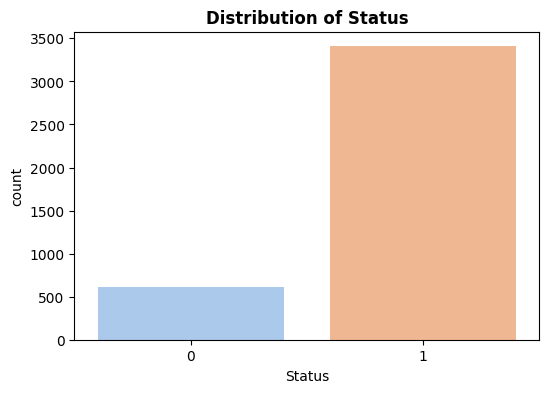

In [33]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Status', data=df_model, palette='pastel')  
plt.title('Distribution of Status', fontweight='bold')
plt.show()


In [34]:
X = df_model.drop('Status', axis=1)
y = df_model['Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

over = SMOTE(sampling_strategy=0.5, random_state=42)  
under = RandomUnderSampler(sampling_strategy=0.8, random_state=42)  
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

X_train_res, y_train_res = pipeline.fit_resample(X_train, y_train)
print('Original dataset shape:', Counter(y_train))
print('Resampled dataset shape:', Counter(y_train_res))


Original dataset shape: Counter({1: 2385, 0: 431})
Resampled dataset shape: Counter({1: 1490, 0: 1192})


In [36]:
svm_models = {
"SVC (RBF kernel)": SVC(kernel='rbf'),
"Linear SVM": SVC(kernel='linear'),
"Polynomial SVM": SVC(kernel='poly', degree=3)
}

In [37]:
print("\nSVM Models(Before Resampling):\n")
for name, model in svm_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))


SVM Models(Before Resampling):

SVC (RBF kernel) Accuracy: 0.8525
              precision    recall  f1-score   support

           0       0.65      0.08      0.14       185
           1       0.86      0.99      0.92      1022

    accuracy                           0.85      1207
   macro avg       0.75      0.54      0.53      1207
weighted avg       0.83      0.85      0.80      1207

Linear SVM Accuracy: 0.8467
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       185
           1       0.85      1.00      0.92      1022

    accuracy                           0.85      1207
   macro avg       0.42      0.50      0.46      1207
weighted avg       0.72      0.85      0.78      1207



c:\Users\mo\venv310\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\mo\venv310\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\mo\venv310\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Polynomial SVM Accuracy: 0.8500
              precision    recall  f1-score   support

           0       0.53      0.17      0.26       185
           1       0.87      0.97      0.92      1022

    accuracy                           0.85      1207
   macro avg       0.70      0.57      0.59      1207
weighted avg       0.82      0.85      0.82      1207



Before Resampling
Accuracy was high (~85%) for all kernels, but:

Class 0 (minority) had very low recall (as low as 0.00 for Linear SVM, and 0.08 for RBF).

This means the model almost completely ignored class 0 (lots of false negatives).

This is common in imbalanced datasets—accuracy is misleading because the model learns to predict the majority class (class 1).

Summary: The model performs well only for class 1, failing on class 0—not acceptable for many real-world use cases, especially if class 0 is critical (e.g., fraud detection, disease diagnosis, etc.).



In [38]:
print("\nSVM Models(After Resampling):\n")
for name, model in svm_models.items():
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))


SVM Models(After Resampling):

SVC (RBF kernel) Accuracy: 0.7498
              precision    recall  f1-score   support

           0       0.31      0.52      0.39       185
           1       0.90      0.79      0.84      1022

    accuracy                           0.75      1207
   macro avg       0.61      0.66      0.62      1207
weighted avg       0.81      0.75      0.77      1207

Linear SVM Accuracy: 0.7804
              precision    recall  f1-score   support

           0       0.35      0.49      0.41       185
           1       0.90      0.83      0.87      1022

    accuracy                           0.78      1207
   macro avg       0.62      0.66      0.64      1207
weighted avg       0.82      0.78      0.80      1207

Polynomial SVM Accuracy: 0.7788
              precision    recall  f1-score   support

           0       0.33      0.43      0.37       185
           1       0.89      0.84      0.87      1022

    accuracy                           0.78      1207
  

Accuracy dropped slightly (to ~75–78%)—this is expected.

Recall for class 0 improved significantly (from 0.08 to 0.52 for RBF, 0.49 for Linear, 0.43 for Poly).

Class balance is better handled, and the macro average F1-score improved from ~0.5 to ~0.62.

Summary: The model learns both classes better after resampling, which is a clear improvement for balanced performance—especially that class 0 matters.

### GridSearchCV

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
 
 
param_grid = {
    'kernel': ['rbf', 'poly', 'linear', 'sigmoid'],
    'C': [0.1, 1, 10],       
    'gamma': [0.001, 0.01, 0.1], 
    'degree': [2, 3],          
    'class_weight': ['balanced'],
}
 
grid_search = GridSearchCV(
    estimator=SVC(),
    param_grid=param_grid,
    scoring='f1_macro',  
    cv=5,
    verbose=2,
    n_jobs=-1,
)
 
grid_search.fit(X_train_res, y_train_res)
 
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'C': 10, 'class_weight': 'balanced', 'degree': 2, 'gamma': 0.1, 'kernel': 'rbf'}
Best Score: 0.7574695106214895


| Parameter      | What it does                                                                |
| -------------- | --------------------------------------------------------------------------- |
| `C`            | Regularization strength. **Higher = less regularization**, risk of overfit. |
| `gamma`        | Controls the influence of a single data point. Smaller = broader influence. |
| `kernel`       | Type of SVM kernel function. `'rbf'`, `'poly'`, `'sigmoid'`, `'linear'`.    |
| `degree`       | Used **only when kernel = 'poly'**. Sets the degree of the polynomial.      |
| `class_weight` | `'balanced'` tells SVM to adjust for class imbalance automatically.         |


| Argument              | Explanation                                            |
| --------------------- | ------------------------------------------------------ |
| `svc`                 | The base model to tune.                                |
| `param_grid`          | The hyperparameter ranges from above.                  |
| `scoring='f1_macro'`  | Optimizes for **balanced performance** on all classes. |
| `cv=5`                | Uses **5-fold cross-validation** for evaluation.       |
| `verbose=2`           | Shows progress output while running.                   |
| `n_jobs=-1`           | Uses **all CPU cores** for faster computation.         |


In [40]:
y_pred = grid_search.predict(X_test)
 
from sklearn.metrics import classification_report, accuracy_score
 
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7183098591549296
Classification Report:
              precision    recall  f1-score   support

           0       0.24      0.39      0.30       185
           1       0.88      0.78      0.82      1022

    accuracy                           0.72      1207
   macro avg       0.56      0.59      0.56      1207
weighted avg       0.78      0.72      0.74      1207



In [41]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import classification_report, confusion_matrix

best_model = grid_search.best_estimator_  

calibrated_svm = CalibratedClassifierCV(estimator=best_model, cv=3)
calibrated_svm.fit(X_train_res, y_train_res)  
 
y_proba = calibrated_svm.predict_proba(X_test)
 
thresholds = np.arange(0.1, 0.9, 0.1)
for thresh in thresholds:
    y_pred_thresh = (y_proba[:, 0] > thresh).astype(int)  # class 0 = وفاة
    print(f"Threshold: {thresh:.1f}")
    print(confusion_matrix(y_test, y_pred_thresh))
    print(classification_report(y_test, y_pred_thresh))
    print("-" * 50)
 


Threshold: 0.1
[[ 11 174]
 [114 908]]
              precision    recall  f1-score   support

           0       0.09      0.06      0.07       185
           1       0.84      0.89      0.86      1022

    accuracy                           0.76      1207
   macro avg       0.46      0.47      0.47      1207
weighted avg       0.72      0.76      0.74      1207

--------------------------------------------------
Threshold: 0.2
[[ 42 143]
 [470 552]]
              precision    recall  f1-score   support

           0       0.08      0.23      0.12       185
           1       0.79      0.54      0.64      1022

    accuracy                           0.49      1207
   macro avg       0.44      0.38      0.38      1207
weighted avg       0.69      0.49      0.56      1207

--------------------------------------------------
Threshold: 0.3
[[ 71 114]
 [651 371]]
              precision    recall  f1-score   support

           0       0.10      0.38      0.16       185
           1       0.

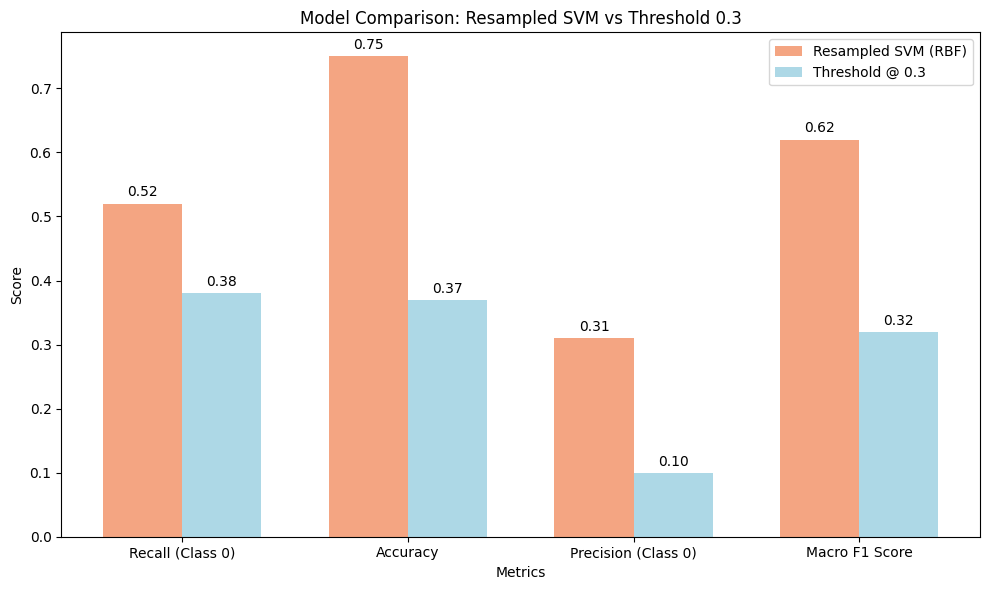

In [42]:
# Scores for Resampled SVM (RBF) and Threshold @ 0.3
metrics = ['Recall (Class 0)', 'Accuracy', 'Precision (Class 0)', 'Macro F1 Score']

resampled_svm_scores = [0.52, 0.75, 0.31, 0.62]  
threshold_scores = [0.38, 0.37, 0.10, 0.32]      

x = np.arange(len(metrics))  
width = 0.35  

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width / 2, resampled_svm_scores, width, label='Resampled SVM (RBF)', color='#f4a582')
bars2 = ax.bar(x + width / 2, threshold_scores, width, label='Threshold @ 0.3', color='#add8e6')

ax.set_xlabel('Metrics')
ax.set_ylabel('Score')
ax.set_title('Model Comparison: Resampled SVM vs Threshold 0.3')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Model Evaluation
### Class Imbalance Problem:
- The dataset was highly imbalanced.
- This caused model to **predict almost everyone as Alive (class 1)**, achieving high accuracy but **missing most death cases**.

### Resampling Solution:
To solve the imbalance:
- Used **SMOTE** to oversample class 0 to 50% of class 1.
- Used **RandomUnderSampler** to reduce class 1 to 80% of the oversampled minority.
- This made the training data more balanced.

**After resampling, the model detected significantly more deaths (class 0), increasing fairness.**


### Why Recall is More Important than Accuracy:
- **Accuracy** looks good when the model predicts the majority class (Alive), even if it misses all death cases.
- In our case, **detecting deaths early is critical** (e.g., for medical decisions).
- That’s why **recall for class 0 (deaths)** is more important – it measures how many actual death cases we can correctly identify.

> Even if the overall accuracy drops a bit, improving **recall for class 0** is more valuable in medical scenarios.


### Model Results Summary:

| Model        | Accuracy | Class 0 Recall | Class 1 Recall | Macro F1 |
|--------------|----------|----------------|----------------|----------|
| **SVM Before Resampling** | 85%      | 0.08           | 0.99           | 0.53     |
| **SVM After Resampling**  | 79%      | **0.52**       | 0.83           | **0.64** |

**SVM after resampling provides the best trade-off**: much better recall for deaths while still maintaining good performance.


### Threshold Tuning:
Tried different classification thresholds (0.1 – 0.8) to boost death prediction.
- Lower thresholds increased **recall for class 0**, but **hurt precision and accuracy heavily**.
- Best performance still came from using resampled data + default threshold (0.5).


### Neural Netowrk

In [43]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

# Define Parameter Grid for GridSearchCV
param_grid = {
'alpha': [0.0001, 0.001, 0.01], 
}
grid_search = GridSearchCV(MLPClassifier(), param_grid, cv=5, n_jobs=-1, verbose=2, scoring='f1_macro')

grid_search.fit(X_train_res, y_train_res)

print(f"\nBest Parameters: {grid_search.best_params_}")

Fitting 5 folds for each of 3 candidates, totalling 15 fits

Best Parameters: {'alpha': 0.0001}


c:\Users\mo\venv310\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



MLP Designs with Various Options

In [44]:
alpha = grid_search.best_params_['alpha']
models = {
	"Simple (10 neurons, Sigmoid)": MLPClassifier(hidden_layer_sizes=(10,), activation='logistic', alpha=alpha),
	"Deep (64-32-16 neurons, Sigmoid)": MLPClassifier(hidden_layer_sizes=(64, 32, 16), activation='logistic', alpha=alpha),
	"Simple (10 neurons, ReLU)": MLPClassifier(hidden_layer_sizes=(10,), activation='relu', alpha=alpha),
	"Deep (64-32-16 neurons, ReLU)": MLPClassifier(hidden_layer_sizes=(64, 32, 16), activation='relu', alpha=alpha),
}

In [ ]:
results = {}
for name, model in models.items():
    print(f"\nTraining model: {name}")
    # Train the model
    model.fit(X_train_res, y_train_res)
    # Make predictions
    y_pred = model.predict(X_test)
    # Evaluate the model
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    # Print evaluation
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    # Cross-validation (5-fold)
    cv_scores = cross_val_score(model, X_train_res, y_train_res, cv=5, scoring='accuracy')
    print(f"Cross-validation scores (5-fold): {cv_scores}")
    print(f"Mean cross-validation accuracy: {cv_scores.mean():.4f}")
    print("...............................................................................")


Training model: Simple (10 neurons, Sigmoid)


c:\Users\mo\venv310\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



Accuracy: 0.7655
Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.60      0.44       185
           1       0.92      0.80      0.85      1022

    accuracy                           0.77      1207
   macro avg       0.63      0.70      0.65      1207
weighted avg       0.83      0.77      0.79      1207



c:\Users\mo\venv310\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\mo\venv310\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\mo\venv310\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



Cross-validation scores (5-fold): [0.68342644 0.67970205 0.69216418 0.72014925 0.67537313]
Mean cross-validation accuracy: 0.6902
...............................................................................

Training model: Deep (64-32-16 neurons, Sigmoid)


c:\Users\mo\venv310\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



Accuracy: 0.7299
Classification Report:
              precision    recall  f1-score   support

           0       0.30      0.56      0.39       185
           1       0.91      0.76      0.83      1022

    accuracy                           0.73      1207
   macro avg       0.60      0.66      0.61      1207
weighted avg       0.81      0.73      0.76      1207



c:\Users\mo\venv310\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\mo\venv310\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\mo\venv310\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\mo\venv310\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\mo\venv310\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iteration

Cross-validation scores (5-fold): [0.69087523 0.67970205 0.70895522 0.72947761 0.69216418]
Mean cross-validation accuracy: 0.7002
...............................................................................

Training model: Simple (10 neurons, ReLU)


c:\Users\mo\venv310\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



Accuracy: 0.7506
Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.57      0.41       185
           1       0.91      0.78      0.84      1022

    accuracy                           0.75      1207
   macro avg       0.62      0.68      0.63      1207
weighted avg       0.82      0.75      0.78      1207



c:\Users\mo\venv310\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\mo\venv310\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\mo\venv310\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\mo\venv310\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\mo\venv310\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iteration

Cross-validation scores (5-fold): [0.66852886 0.67970205 0.70335821 0.73320896 0.70522388]
Mean cross-validation accuracy: 0.6980
...............................................................................

Training model: Deep (64-32-16 neurons, ReLU)


c:\Users\mo\venv310\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



Accuracy: 0.7382
Classification Report:
              precision    recall  f1-score   support

           0       0.26      0.38      0.31       185
           1       0.88      0.80      0.84      1022

    accuracy                           0.74      1207
   macro avg       0.57      0.59      0.57      1207
weighted avg       0.78      0.74      0.76      1207



c:\Users\mo\venv310\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\mo\venv310\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\mo\venv310\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\mo\venv310\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



Cross-validation scores (5-fold): [0.73370577 0.75418994 0.82649254 0.79664179 0.83022388]
Mean cross-validation accuracy: 0.7883
...............................................................................


c:\Users\mo\venv310\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



### Best Model in Both SVM and Neural

In [58]:
alpha = 0.001  
model_nn = MLPClassifier(hidden_layer_sizes=(10,), activation='logistic', alpha=alpha, max_iter=200, random_state=42)

# Train the model
print("\nTraining model: Simple (10 neurons, Sigmoid)")
model_nn.fit(X_train_res, y_train_res)

# Make predictions
y_pred = model_nn.predict(X_test)
y_pred_proba_nn = model_nn.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))



Training model: Simple (10 neurons, Sigmoid)
Accuracy: 0.7705
Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.61      0.45       185
           1       0.92      0.80      0.86      1022

    accuracy                           0.77      1207
   macro avg       0.64      0.71      0.65      1207
weighted avg       0.83      0.77      0.79      1207



c:\Users\mo\venv310\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



In [59]:
model_svm = SVC(kernel='rbf')
model_svm.fit(X_train_res, y_train_res)
y_pred_svm = model_svm.predict(X_test)
y_pred_proba_svm = model_svm.decision_function(X_test)  # Decision function values
accuracy = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))


Accuracy: 0.7498
Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.52      0.39       185
           1       0.90      0.79      0.84      1022

    accuracy                           0.75      1207
   macro avg       0.61      0.66      0.62      1207
weighted avg       0.81      0.75      0.77      1207



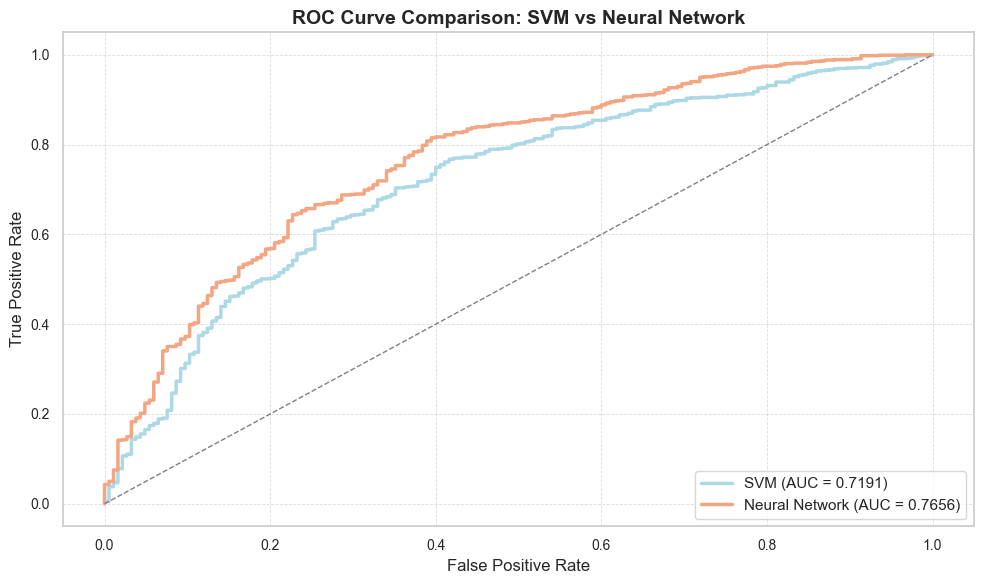

In [60]:
from sklearn.metrics import roc_curve, roc_auc_score

sns.set(style="whitegrid")

fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_proba_svm)
roc_auc_svm = roc_auc_score(y_test, y_pred_proba_svm)

fpr_nn, tpr_nn, _ = roc_curve(y_test, y_pred_proba_nn)
roc_auc_nn = roc_auc_score(y_test, y_pred_proba_nn)

plt.figure(figsize=(10, 6))

plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC = {roc_auc_svm:.4f})", color="#add8e6", linewidth=2.5)
plt.plot(fpr_nn, tpr_nn, label=f"Neural Network (AUC = {roc_auc_nn:.4f})", color="#f4a582", linewidth=2.5)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", linewidth=1)

plt.title("ROC Curve Comparison: SVM vs Neural Network", fontsize=14, weight='bold')
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc="lower right", fontsize=11)
plt.grid(True, linestyle='--', linewidth=0.6, alpha=0.7)
plt.tight_layout()

plt.show()


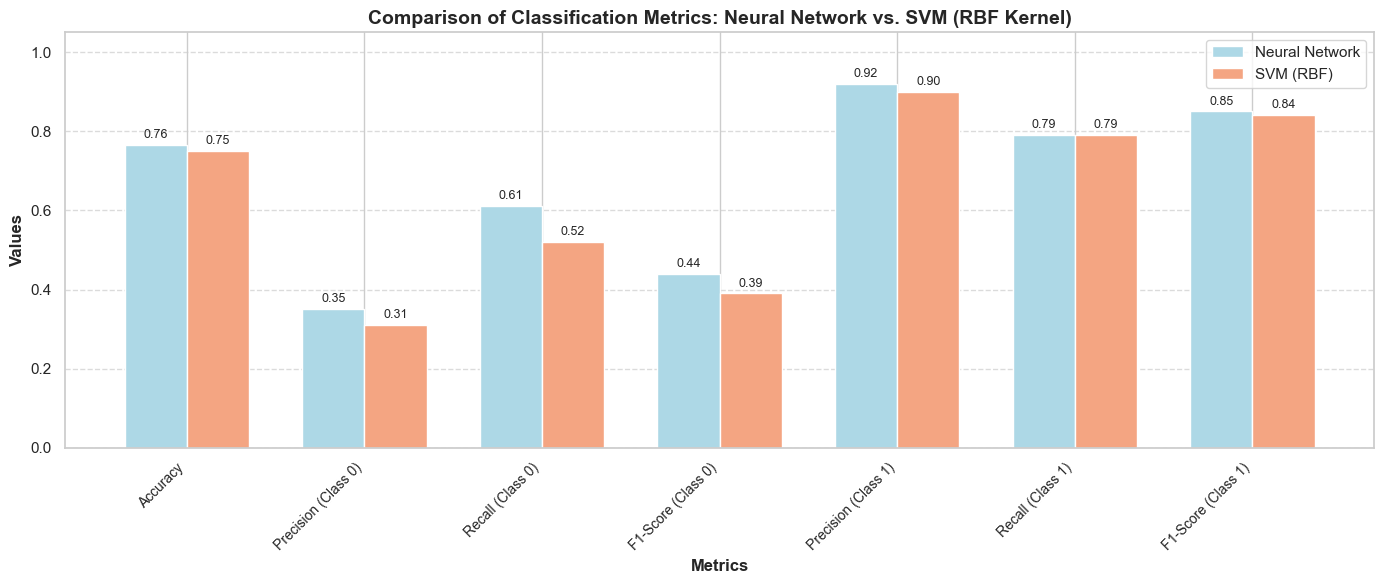

In [55]:
sns.set(style="whitegrid")

nn_metrics = {
    "Accuracy": 0.7647,
    "Precision (Class 0)": 0.35,
    "Recall (Class 0)": 0.61,
    "F1-Score (Class 0)": 0.44,
    "Precision (Class 1)": 0.92,
    "Recall (Class 1)": 0.79,
    "F1-Score (Class 1)": 0.85
}

svm_metrics = {
    "Accuracy": 0.7498,
    "Precision (Class 0)": 0.31,
    "Recall (Class 0)": 0.52,
    "F1-Score (Class 0)": 0.39,
    "Precision (Class 1)": 0.90,
    "Recall (Class 1)": 0.79,
    "F1-Score (Class 1)": 0.84
}

metrics = list(nn_metrics.keys())
nn_values = list(nn_metrics.values())
svm_values = list(svm_metrics.values())

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(14, 6))
bars1 = plt.bar(x - width/2, nn_values, width, label='Neural Network', color='#add8e6')
bars2 = plt.bar(x + width/2, svm_values, width, label='SVM (RBF)', color='#f4a582')

for bar in bars1 + bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f'{height:.2f}', 
             ha='center', va='bottom', fontsize=9)

plt.xlabel('Metrics', fontsize=12, weight='bold')
plt.ylabel('Values', fontsize=12, weight='bold')
plt.title('Comparison of Classification Metrics: Neural Network vs. SVM (RBF Kernel)', fontsize=14, weight='bold')
plt.xticks(x, metrics, rotation=45, ha='right', fontsize=10)
plt.ylim(0, 1.05)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Table Comparing SVM and Neural Network Models

| **Metric**               | **SVM (RBF Kernel)** | **Neural Network (Simple, Sigmoid)** |
|--------------------------|----------------------|--------------------------------------|
| Accuracy                 | 0.7498               | 0.7647                               |
| Precision (Class 0)      | 0.31                 | 0.35                                 |
| Recall (Class 0)         | 0.52                 | 0.61                                 |
| F1-Score (Class 0)       | 0.39                 | 0.44                                 |
| Precision (Class 1)      | 0.90                 | 0.92                                 |
| Recall (Class 1)         | 0.79                 | 0.79                                 |
| F1-Score (Class 1)       | 0.84                 | 0.85                                 |
| Macro Avg Precision      | 0.61                 | 0.63                                 |
| Macro Avg Recall         | 0.66                 | 0.70                                 |
| Macro Avg F1-Score       | 0.62                 | 0.65                                 |
| Weighted Avg Precision   | 0.81                 | 0.83                                 |
| Weighted Avg Recall      | 0.75                 | 0.76                                 |
| Weighted Avg F1-Score    | 0.77                 | 0.79                                 |


The **Neural Network (Simple, Sigmoid)** offers **better overall performance**, especially in **detecting the minority class (class 0)**, and achieves **higher accuracy and balanced metrics**. Further improvements can be made for both models via tuning, regularization, and advanced techniques like ensemble learning.


